# 아파트 실거래가 예측

In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

warnings.filterwarnings('ignore')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.style.use('ggplot')

## Data Load

In [197]:
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')
park_df = pd.read_csv('./input/park.csv')
center_df = pd.read_csv('./input/day_care_center.csv')

In [198]:
train_df.tail(20)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
1216533,1234808,9237,부산광역시,정관읍 모전리,723,이지더원,정관읍 모전리 723 이지더원,59.8832,2011,201711,21~30,16,18900
1216534,1234809,9579,부산광역시,정관읍 모전리,759,정관 롯데캐슬 2차,정관읍 모전리 759 정관 롯데캐슬 2차,101.8124,2013,201711,21~30,6,31900
1216535,1234810,3499,부산광역시,정관읍 모전리,728,동일스위트 3차,정관읍 모전리 728 동일스위트 3차,65.9397,2014,201711,21~30,15,22300
1216536,1234811,9237,부산광역시,정관읍 모전리,723,이지더원,정관읍 모전리 723 이지더원,59.8832,2011,201711,21~30,13,18800
1216537,1234812,3499,부산광역시,정관읍 모전리,728,동일스위트 3차,정관읍 모전리 728 동일스위트 3차,65.9876,2014,201711,21~30,10,22300
1216538,1234813,9237,부산광역시,정관읍 모전리,723,이지더원,정관읍 모전리 723 이지더원,59.8832,2011,201711,21~30,3,18000
1216539,1234814,9237,부산광역시,정관읍 모전리,723,이지더원,정관읍 모전리 723 이지더원,84.7808,2011,201711,21~30,8,23800
1216540,1234815,9588,부산광역시,정관읍 용수리,1322,정관신동아파밀리에,정관읍 용수리 1322 정관신동아파밀리에,107.8300,2008,201711,1~10,11,32500
1216541,1234816,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,59.6502,2012,201711,1~10,11,23500
1216542,1234817,9578,부산광역시,정관읍 용수리,1387,정관 동일스위트1차,정관읍 용수리 1387 정관 동일스위트1차,59.4964,2012,201711,11~20,19,25000


- exclusive_use_area: 전용면적(한 세대만 독점적으로 사용하는 공간)
- transaction_real_price: 실거래가(단위:만원, 타겟 값, train만 존재)
- transaction_year_month: 거래년월
- transaction_date: 거래일
- floor: 층 

- 데이터가 거래시간 순으로 이루어져 있음

## Preprocessing
### Train and Test set

In [199]:
train_df.describe() 

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor,transaction_real_price
count,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06,1.216553e+06
mean,6.091530e+05,6.299685e+03,7.816549e+01,1.998297e+03,2.012984e+05,9.343291e+00,3.822769e+04
std,3.526198e+05,3.581169e+03,2.915113e+01,8.941347e+00,2.905732e+02,6.606500e+00,3.104898e+04
min,0.000000e+00,0.000000e+00,9.260000e+00,1.961000e+03,2.008010e+05,-4.000000e+00,1.000000e+02
25%,3.041380e+05,3.345000e+03,5.976000e+01,1.993000e+03,2.010100e+05,4.000000e+00,1.900000e+04
50%,6.082760e+05,5.964000e+03,8.241000e+01,1.999000e+03,2.013120e+05,8.000000e+00,3.090000e+04
75%,9.124140e+05,9.436000e+03,8.497000e+01,2.005000e+03,2.015110e+05,1.300000e+01,4.700000e+04
max,1.234827e+06,1.265800e+04,4.243200e+02,2.017000e+03,2.017110e+05,8.000000e+01,8.200000e+05


In [200]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

- train_df 결측치는 없음
- 1961년 ~ 2017년 완공 건물
- 9.26m^2 ~ 424.32m^2 전용면적
- Floor의 경우 음의 값 존재.
- 실거래가는 100만원부터 820억까지 존재

In [201]:
train_df.loc[train_df['transaction_real_price']==820000]

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
23603,23603,11320,서울특별시,한남동,810,한남더힐,한남동 810 한남더힐,244.749,2011,201612,21~31,3,820000


#### Price

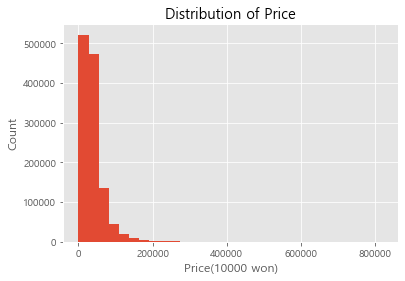

In [202]:
# train price
plt.figure()
plt.hist(train_df['transaction_real_price'], bins=30)
plt.xlabel('Price(10000 won)')
plt.ylabel('Count')
plt.title('Distribution of Price')
plt.show()

- 가격의 분포가 매우 왼쪽으로 치우친 것을 확인할 수 있음
- 타겟 변수의 이상치가 회귀모형을 사용한 예측에 큰 영향을 줄 수 있음
    - 로그 변환으로 정규화한뒤, 나중에 다시 역변환

#### Area

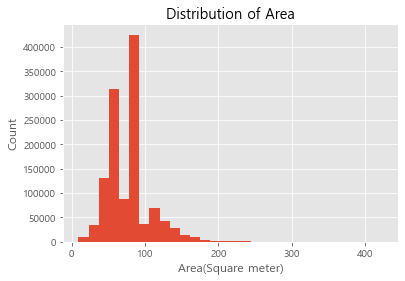

In [203]:
# train area
plt.figure()
plt.hist(train_df['exclusive_use_area'], bins=30)
plt.xlabel('Area(Square meter)')
plt.ylabel('Count')
plt.title('Distribution of Area')
plt.show()

- 면적도 마찬가지로 정규화

#### What is Underground Floor ?

In [204]:
under_floor = train_df.loc[train_df['floor']<0]
print(f'총 {under_floor.shape[0]}개의 음수 층 있음')
print(under_floor['floor'].value_counts())

총 168개의 음수 층 있음
-1    140
-2     17
-3      7
-4      4
Name: floor, dtype: int64


- 168개의 지하층이 존재함

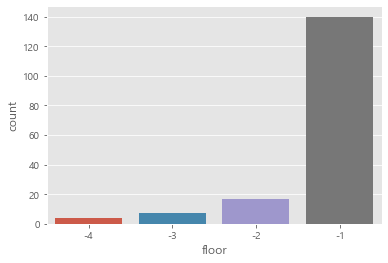

In [205]:
plt.figure()
sns.countplot(under_floor['floor'])
plt.title('')
plt.show()

In [206]:
under_floor[['floor', 'transaction_real_price']].corr()

,floor,transaction_real_price
floor,1.000000,-0.126958
transaction_real_price,-0.126958,1.000000


층수와 가격간의 선형 설명력이 어느정도 존재하기 때문에 제거하지 않는다.

In [207]:
test_df.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21


In [208]:
test_df.describe()

,transaction_id,apartment_id,exclusive_use_area,year_of_completion,transaction_year_month,floor
count,5.463000e+03,5463.000000,5463.000000,5463.000000,5463.000000,5463.000000
mean,1.167126e+06,6287.570932,79.495250,2000.431082,201710.228446,8.266886
std,4.075365e+04,3624.756304,32.935434,9.982040,2.798195,6.082475
min,1.092791e+06,12.000000,10.321500,1961.000000,201701.000000,-1.000000
25%,1.134296e+06,3278.000000,59.760000,1995.000000,201709.000000,4.000000
50%,1.167937e+06,6091.000000,81.720000,2002.000000,201712.000000,7.000000
75%,1.202560e+06,9416.500000,84.970000,2007.000000,201712.000000,11.000000
max,1.234930e+06,12652.000000,273.860000,2017.000000,201712.000000,55.000000


In [209]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5463 non-null   int64  
 1   apartment_id            5463 non-null   int64  
 2   city                    5463 non-null   object 
 3   dong                    5463 non-null   object 
 4   jibun                   5463 non-null   object 
 5   apt                     5463 non-null   object 
 6   addr_kr                 5463 non-null   object 
 7   exclusive_use_area      5463 non-null   float64
 8   year_of_completion      5463 non-null   int64  
 9   transaction_year_month  5463 non-null   int64  
 10  transaction_date        5463 non-null   object 
 11  floor                   5463 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 512.3+ KB


- test셋에도 널값은 존재하지 않음.
- 실거래가 변수 없음(타겟 변수)
- 완공연도 1961년부터 2017년
- 실거래연도는 2017년도만 존재함
- 전용면적은 10.32m^2부터 273.86m^2까지 존재

<AxesSubplot:xlabel='transaction_year_month', ylabel='count'>

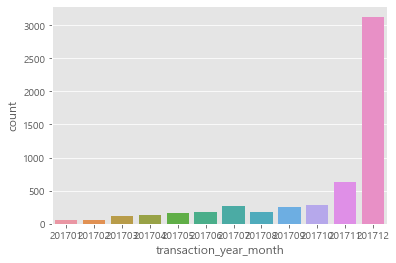

In [210]:
sns.countplot(test_df['transaction_year_month'])

2017년 데이터만 존재하며, 12월 데이터가 가장 많음

### Park Data

In [211]:
park_df.head()

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


- 시설에 매우 많은 결측치가 존재함
- 시설이 존재하면 1 없으면 0으로 값 대체


#### Null Data Replace

In [212]:
park_df.iloc[:,6:11] = park_df.iloc[:,6:11].notnull().astype(int)
park_df

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,0,0,0,0,0,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,0,0,0,0,0,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,0,0,0,0,0,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,0,0,0,0,0,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,0,0,0,0,0,1970.0,2018-08-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,서울특별시,구로구,천왕동,이펜시아어린이공원,어린이공원,1500.0,0,1,0,0,0,2006.0,2019-02-25
1355,서울특별시,구로구,천왕동,개명소공원,소공원,5415.0,0,0,0,0,0,2006.0,2019-02-25
1356,서울특별시,구로구,천왕동,봉화대근린공원,근린공원,60975.0,0,0,0,0,0,2006.0,2019-02-25
1357,서울특별시,구로구,항동,푸른수목원,근린공원,100809.0,0,0,0,0,0,2005.0,2019-02-25


#### Park Area

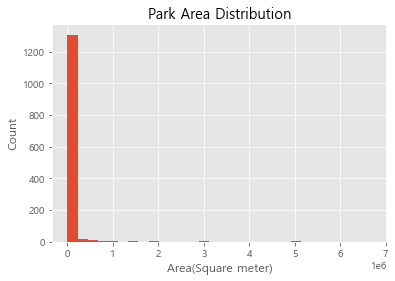

In [213]:
plt.figure()
plt.hist(park_df['park_area'], bins=30)
plt.xlabel('Area(Square meter)')
plt.ylabel('Count')
plt.title('Park Area Distribution')
plt.show()

- 분포가 매우 왼쪽으로 치우친 형태
- 공원 면적이 집 값에 영향을 미치는가?

#### Facility Correlation 

Text(0.5, 1.0, 'Facility Corr. Heatmap')

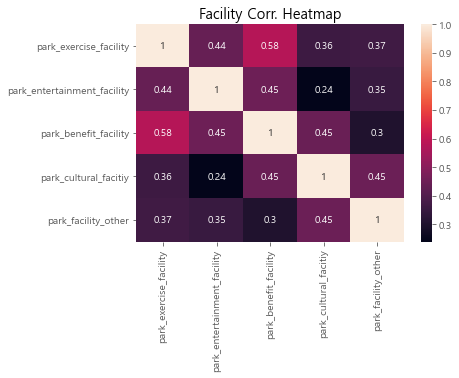

In [214]:
facility = park_df.iloc[:,6:11]
plt.figure()
sns.heatmap(facility.corr(), annot=True)
plt.title('Facility Corr. Heatmap')

- 공원 시설 간 어느정도 관계는 있으나 다중공선성은 없다고 판단됨.

### Center

In [215]:
center_df.head()

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


In [216]:
center_df.describe()

,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
count,7551.000000,7326.000000,4352.000000,3626.000000,5280.000000
mean,44.396636,9.013514,4.528033,0.398235,6.676136
std,37.022079,5.809909,2.075709,0.730602,4.482168
min,5.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,6.000000,3.000000,0.000000,4.000000
50%,29.000000,7.000000,4.000000,0.000000,5.000000
75%,60.000000,11.000000,5.000000,1.000000,8.000000
max,489.000000,98.000000,22.000000,16.000000,53.000000


In [217]:
center_df.isna().sum()

city                       0
gu                         0
day_care_name              0
day_care_type              0
day_care_baby_num          0
teacher_num              225
nursing_room_num        3199
playground_num          3925
CCTV_num                2271
is_commuting_vehicle     496
reference_date             0
dtype: int64

In [218]:
center_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  7551 non-null   object 
 1   gu                    7551 non-null   object 
 2   day_care_name         7551 non-null   object 
 3   day_care_type         7551 non-null   object 
 4   day_care_baby_num     7551 non-null   int64  
 5   teacher_num           7326 non-null   float64
 6   nursing_room_num      4352 non-null   float64
 7   playground_num        3626 non-null   float64
 8   CCTV_num              5280 non-null   float64
 9   is_commuting_vehicle  7055 non-null   object 
 10  reference_date        7551 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 649.0+ KB


In [219]:
center_df['is_commuting_vehicle'].value_counts()

N    4102
Y    2446
      401
y      88
n      18
Name: is_commuting_vehicle, dtype: int64

- is_commuting_vehicle에는 nan값과 공백값이 각각 496개, 401개 존재함
- 먼저 소문자를 대문자로 바꿈

In [220]:
center_df.replace('y','Y',inplace=True)
center_df.replace('n','N',inplace=True)

Text(0.5, 1.0, 'Day Care Type Count Plot')

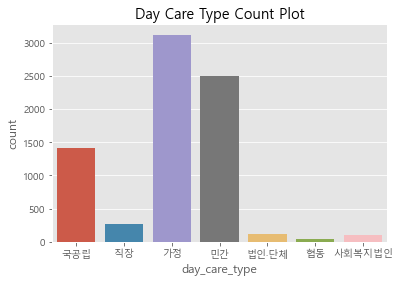

In [221]:
plt.figure()
sns.countplot(center_df['day_care_type'])
plt.title('Day Care Type Count Plot')

- 통근 차량 결측치를 처리하기 위해 각 day_care_type의 Y값 보다 작으면 N, 크면 Y로 대체

In [222]:
center_df.groupby(['day_care_type','is_commuting_vehicle'])['day_care_baby_num'].mean()

day_care_type  is_commuting_vehicle
가정                                     18.390071
               N                       18.166359
               Y                       19.014129
국공립                                    62.319149
               N                       60.781800
               Y                       79.366279
민간                                     63.326531
               N                       44.377634
               Y                       66.266496
법인·단체                                  51.600000
               N                       50.313725
               Y                       78.272727
사회복지법인                                 44.250000
               N                       83.476190
               Y                       87.901235
직장                                     43.375000
               N                       73.267943
               Y                       70.409091
협동                                     38.000000
               N                 

In [223]:
# 결측치 중 평균 
center_df.loc[(center_df['is_commuting_vehicle'].isnull()) & (center_df['day_care_type']=='가정') & (center_df['day_care_baby_num'] < 19), 'is_commuting_vehicle'] = 'N'
center_df.loc[(center_df['is_commuting_vehicle'].isnull()) & (center_df['day_care_type']=='국공립') & (center_df['day_care_baby_num'] < 79), 'is_commuting_vehicle'] = 'N'
center_df.loc[(center_df['is_commuting_vehicle'].isnull()) & (center_df['day_care_type']=='민간') & (center_df['day_care_baby_num'] < 66), 'is_commuting_vehicle'] = 'N'
center_df.loc[(center_df['is_commuting_vehicle'].isnull()) & (center_df['day_care_type']=='법인·단체') & (center_df['day_care_baby_num'] < 78), 'is_commuting_vehicle'] = 'N'
center_df.loc[(center_df['is_commuting_vehicle'].isnull()) & (center_df['day_care_type']=='사회복지법인') & (center_df['day_care_baby_num'] < 87), 'is_commuting_vehicle'] = 'N'
center_df.loc[(center_df['is_commuting_vehicle'].isnull()) & (center_df['day_care_type']=='직장') & (center_df['day_care_baby_num'] < 70), 'is_commuting_vehicle'] = 'N'
center_df.loc[(center_df['is_commuting_vehicle'].isnull()) & (center_df['day_care_type']=='협동') & (center_df['day_care_baby_num'] < 33), 'is_commuting_vehicle'] = 'N'
# 공백값 중 평균
center_df.loc[(center_df['is_commuting_vehicle'] == ' ') & (center_df['day_care_type']=='가정') & (center_df['day_care_baby_num'] < 19), 'is_commuting_vehicle'] = 'N'
center_df.loc[(center_df['is_commuting_vehicle'] == ' ') & (center_df['day_care_type']=='국공립') & (center_df['day_care_baby_num'] < 79), 'is_commuting_vehicle'] = 'N'
center_df.loc[(center_df['is_commuting_vehicle'] == ' ') & (center_df['day_care_type']=='민간') & (center_df['day_care_baby_num'] < 66), 'is_commuting_vehicle'] = 'N'
center_df.loc[(center_df['is_commuting_vehicle'] == ' ') & (center_df['day_care_type']=='법인·단체') & (center_df['day_care_baby_num'] < 78), 'is_commuting_vehicle'] = 'N'
center_df.loc[(center_df['is_commuting_vehicle'] == ' ') & (center_df['day_care_type']=='사회복지법인') & (center_df['day_care_baby_num'] < 87), 'is_commuting_vehicle'] = 'N'
center_df.loc[(center_df['is_commuting_vehicle'] == ' ') & (center_df['day_care_type']=='직장') & (center_df['day_care_baby_num'] < 70), 'is_commuting_vehicle'] = 'N'
center_df.loc[(center_df['is_commuting_vehicle'] == ' ') & (center_df['day_care_type']=='협동') & (center_df['day_care_baby_num'] < 33), 'is_commuting_vehicle'] = 'N'
# 나머지 nan값을 Y로 대체
center_df['is_commuting_vehicle'].replace(' ', 'Y', inplace=True)
center_df['is_commuting_vehicle'].replace(np.nan, 'Y', inplace=True)
# N을 0으로, Y를 1로 대체
center_df['is_commuting_vehicle'].replace('N', 0, inplace=True)
center_df['is_commuting_vehicle'].replace('Y', 1, inplace=True)


print(center_df['is_commuting_vehicle'].value_counts(),'\n', center_df['is_commuting_vehicle'].notnull().sum())

0    4557
1    2994
Name: is_commuting_vehicle, dtype: int64 
 7551


Text(0.5, 1.0, 'Commuting Vehicle Count Plot')

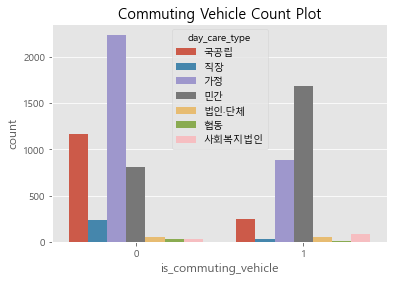

In [224]:
plt.figure()
sns.countplot(center_df['is_commuting_vehicle'], hue='day_care_type', data=center_df)
plt.title('Commuting Vehicle Count Plot')

<AxesSubplot:>

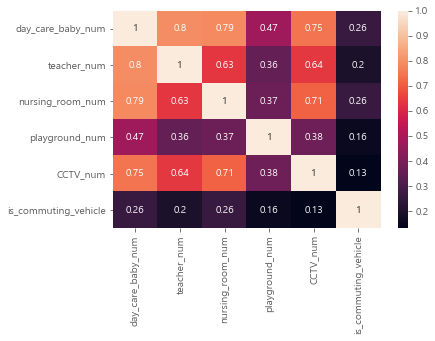

In [227]:
sns.heatmap(center_df.corr(), annot=True)

#### CCTV_num, playground_num, nursing_room_num 결측치
결측치를 처리하기 까다롭고, 다중공선성이 우려되어 피쳐를 삭제하기로 결정

In [228]:
center_df.drop(columns=['playground_num', 'nursing_room_num', 'CCTV_num'], inplace=True)
center_df

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,0,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,0,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,0,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,0,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,0,2018-07-31
...,...,...,...,...,...,...,...,...
7546,부산광역시,금정구,해바라기어린이집,민간,46,13.0,1,2019-01-21
7547,부산광역시,금정구,해수어린이집,가정,19,6.0,1,2019-01-21
7548,부산광역시,금정구,행복한그림동산어린이집,민간,92,16.0,1,2019-01-21
7549,부산광역시,금정구,행복한어린이집,민간,43,12.0,1,2019-01-21


#### 보육시설 원핫인코딩

In [229]:
center_oh = pd.get_dummies(center_df['day_care_type'])
center_oh

,가정,국공립,민간,법인·단체,사회복지법인,직장,협동
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
7546,0,0,1,0,0,0,0
7547,1,0,0,0,0,0,0
7548,0,0,1,0,0,0,0
7549,0,0,1,0,0,0,0


In [230]:
center_df = pd.concat([center_df, center_oh], axis=1)
center_df.drop(columns='day_care_type', inplace=True)
center_df

,city,gu,day_care_name,day_care_baby_num,teacher_num,is_commuting_vehicle,reference_date,가정,국공립,민간,법인·단체,사회복지법인,직장,협동
0,서울특별시,서대문구,가람어린이집,70,11.0,0,2018-07-31,0,1,0,0,0,0,0
1,서울특별시,서대문구,가좌제일어린이집,88,22.0,0,2018-07-31,0,1,0,0,0,0,0
2,서울특별시,서대문구,경찰청어린이집,90,23.0,0,2018-07-31,0,0,0,0,0,1,0
3,서울특별시,서대문구,고운햇살어린이집,18,5.0,0,2018-07-31,1,0,0,0,0,0,0
4,서울특별시,서대문구,고은어린이집,93,20.0,0,2018-07-31,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7546,부산광역시,금정구,해바라기어린이집,46,13.0,1,2019-01-21,0,0,1,0,0,0,0
7547,부산광역시,금정구,해수어린이집,19,6.0,1,2019-01-21,1,0,0,0,0,0,0
7548,부산광역시,금정구,행복한그림동산어린이집,92,16.0,1,2019-01-21,0,0,1,0,0,0,0
7549,부산광역시,금정구,행복한어린이집,43,12.0,1,2019-01-21,0,0,1,0,0,0,0
